In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from src.data.read_dataset import get_processed_dataset

In [3]:
eu = gpd.read_file('../../data/raw/CNTR_RG_10M_2016_3035.geojson')

In [4]:
df = get_processed_dataset('ECDC')

In [5]:
from scipy.optimize import curve_fit
from tabulate import tabulate
from IPython.display import HTML
import numpy as np
import pandas as pd

countries = df[df.EU == 'EU'].CountryExp.unique().tolist() + ['Switzerland', 'United Kingdom']

fits = []
for country in countries:
    country_df = df[(df.Country == country) & (df.TotalCases>10)]
    ydata = country_df.TotalCases[::-1]
    xdata = np.arange(len(ydata))
    try:
        popt, pcov = curve_fit(f=lambda t,a,b: a*2**(t/b),xdata=xdata,ydata=ydata)
        if popt[1] > 0:
            fits.append([country, country_df.GeoId.iloc[0], popt[1]])
    except ValueError:
        continue
        
cdf = pd.DataFrame(fits, columns=['Country', 'GeoId', 'Doubling Rate']).set_index('Country').sort_values('Doubling Rate')
eu_merged = eu.merge(cdf, how = 'right', left_on = 'CNTR_ID', right_on = 'GeoId')

C:\Users\agostine\anaconda3\envs\coronavirus\lib\site-packages\scipy\optimize\minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


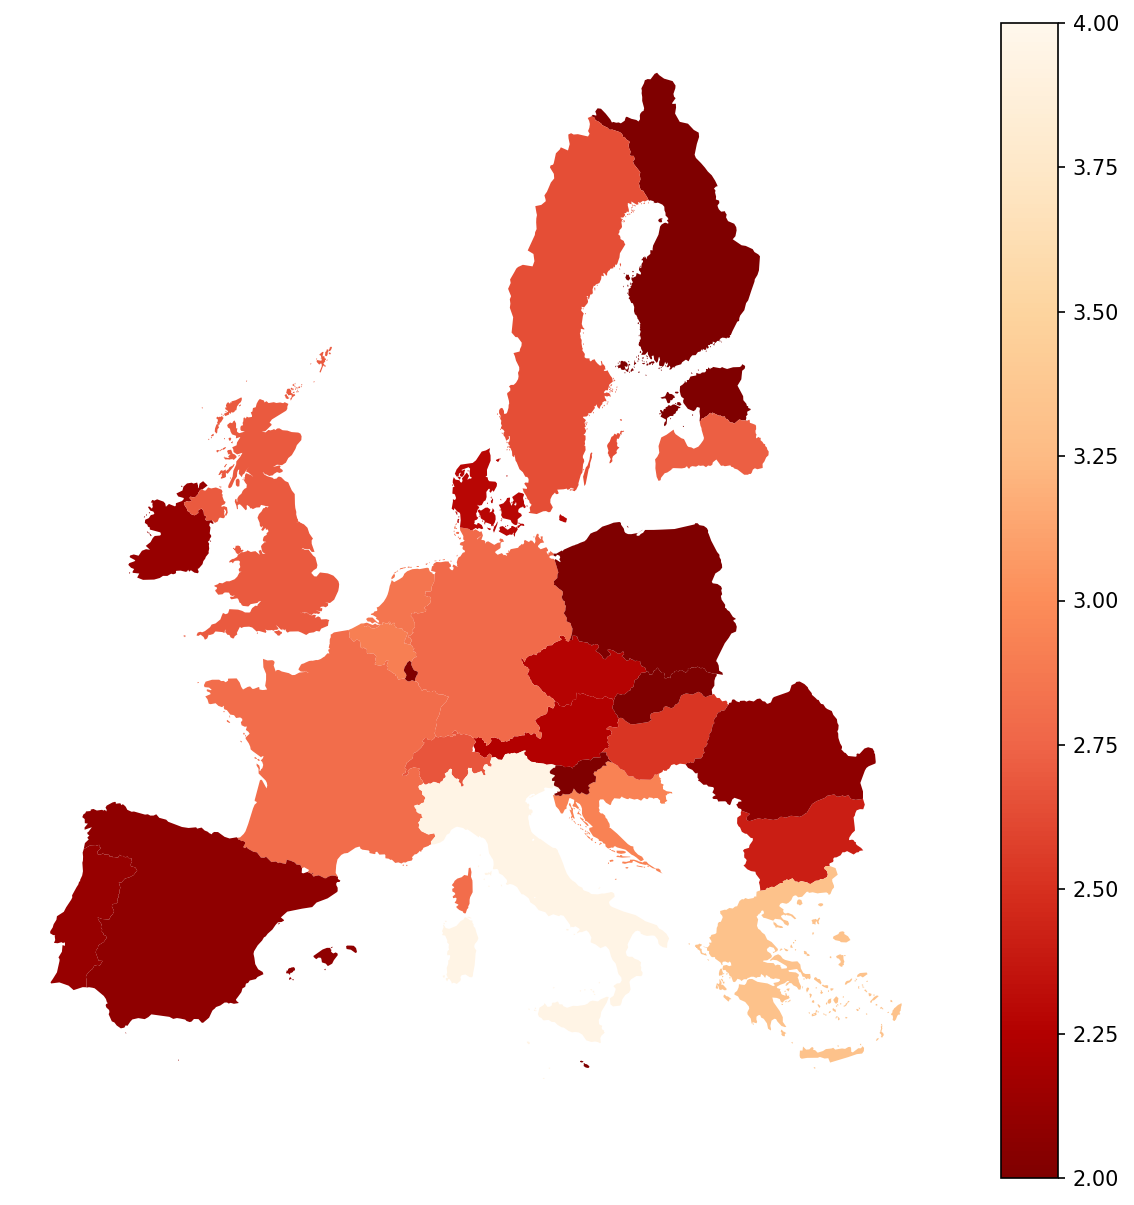

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
eu_merged.plot(ax=ax, column='Doubling Rate', cmap='OrRd_r', legend=True, vmin=2, vmax=4)
ax.set_xlim([0.25e7, 0.6e7])
ax.set_ylim([1e6, 5.5e6])
ax.set_axis_off()

In [8]:
eu.head()

,id,CNTR_NAME,ISO3_CODE,CNTR_ID,NAME_ENGL,FID,geometry
0,AD,Andorra,AND,AD,Andorra,AD,"POLYGON ((3640254.000 2192873.000, 3630033.000..."
1,AE,الإمارات العربية المتحدة,ARE,AE,United Arab Emirates,AE,"MULTIPOLYGON (((8797037.000 1668598.000, 88057..."
2,AF,افغانستان-افغانستان,AFG,AF,Afghanistan,AF,"MULTIPOLYGON (((9337417.000 3947645.000, 93348..."
3,AG,Antigua and Barbuda,ATG,AG,Antigua and Barbuda,AG,"MULTIPOLYGON (((-2555488.000 2784295.000, -256..."
4,AI,Anguilla,AIA,AI,Anguilla,AI,"POLYGON ((-2570726.000 3018132.000, -2564726.0..."
